In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")

In [5]:
iris = sns.load_dataset("iris")

In [6]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
rows, cols = iris.shape
print(f"""
    shape of Data
    No.of rows: {rows}
    No.of cols: {cols}
      """)


    shape of Data
    No.of rows: 150
    No.of cols: 5
      


In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
iris["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [9]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

[]

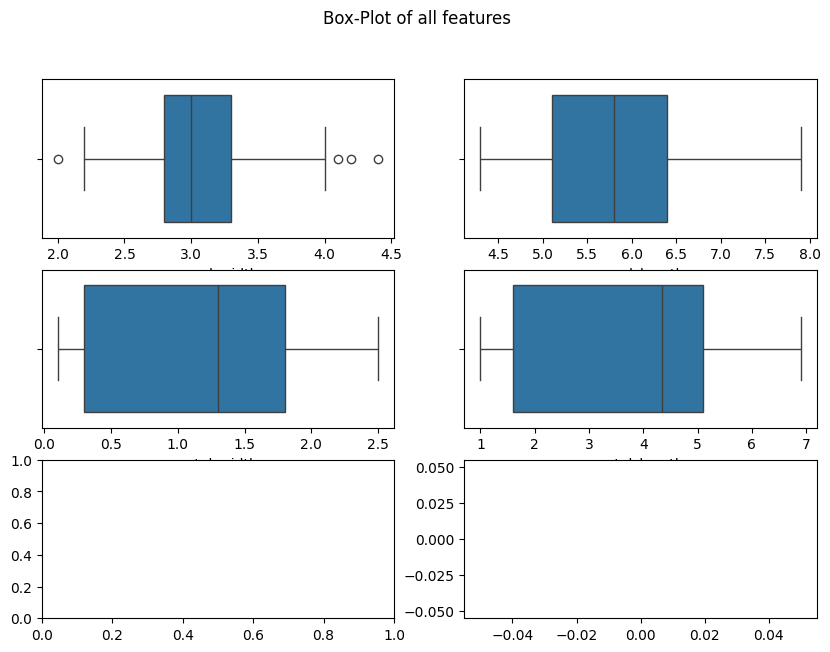

In [11]:
fig, ax = plt.subplots(3, 2, figsize=(10,7))
sns.boxplot(data=iris, x="sepal_width", ax=ax[0][0])
sns.boxplot(data=iris, x="sepal_length", ax=ax[0][1])
sns.boxplot(data=iris, x="petal_width", ax=ax[1][0])
sns.boxplot(data=iris, x="petal_length", ax=ax[1][1])
fig.suptitle("Box-Plot of all features")
plt.plot()

[]

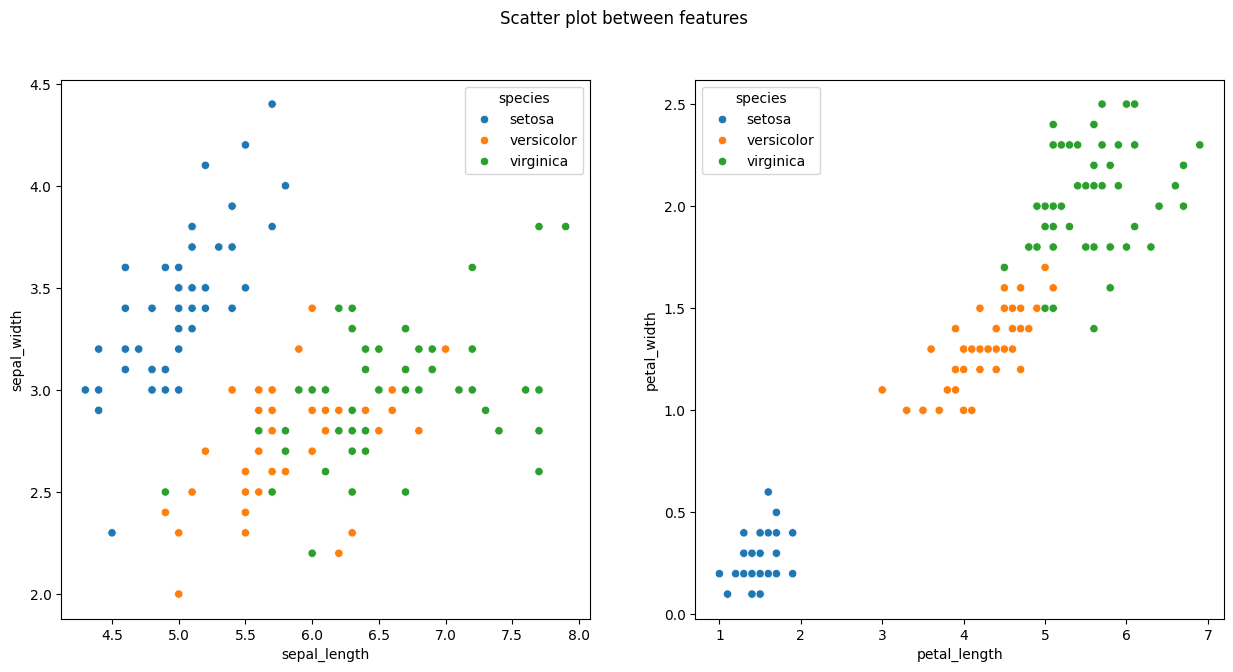

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15,7))

sns.scatterplot(data=iris, x="sepal_length", y="sepal_width", hue="species", ax=ax[0])
sns.scatterplot(data=iris, x="petal_length", y="petal_width", hue="species", ax=ax[1])
fig.suptitle("Scatter plot between features")
plt.plot()

In [ ]:
X = iris.drop(columns=["species"])
y = iris["species"].values.reshape(-1,1)

In [ ]:
oe = OrdinalEncoder().fit(y)
y_ = oe.transform(y)

In [ ]:
oe.categories_

[array(['setosa', 'versicolor', 'virginica'], dtype=object)]

In [ ]:
X.tail()

,sepal_length,sepal_width,petal_length,petal_width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr = LogisticRegression().fit(X_train, y_train)


        Classification Metrics Evaluation
        accuracy score: 0.9333333333333333,
        precision score: [1.         0.76923077 1.        ],
        recall score: [1.   1.   0.85],
        f1 score: [1.         0.86956522 0.91891892]
      
cross val score 0.9555555555555555 



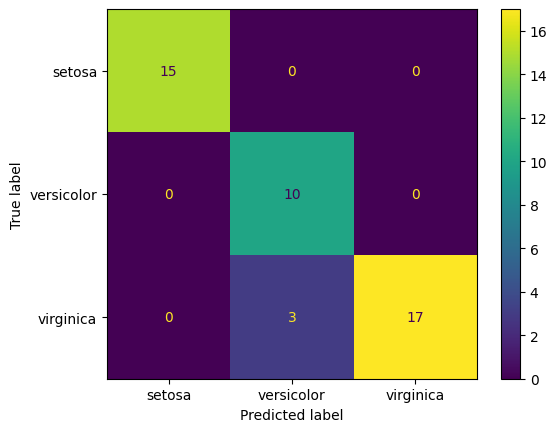

In [ ]:
y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)
print(f"""
        Classification Metrics Evaluation
        accuracy score: {accuracy},
        precision score: {precision},
        recall score: {recall},
        f1 score: {f1}
      """)
print("cross val score", cross_val_score(lr, X=X_test, y=y_test, scoring="accuracy").mean(),"\n")

cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
cmd.plot()